# **Machine Learning in Python: Possible extension related to uncertainties**

Using threshy we are going to learn how optimal threshold in 
the classificaton of the value of the threshold and choose the optimal amount of classification. 
The threshy provides the option to change the value of threshold and select the optimal amount for the classification. 
In this Jupyter notebook, we will focus on tthe Possible extension related to the uncertainities using the Iris data set as an example.

## **What is main Focus and Objective?**

Our focus will be on the Binary Classification where we will come up with the ROC Curves. The **ROC curve** summarizes the prediction performance of the binary classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Accuracy)} = \frac{TP + TN}{N}$

At this point the TP holds the value 1 and the modal is assigned it the value 1. 
The TN Value holds the value 0 and the modal assigned the value 0. 
We will also consider the fact the problem of the binary classification has a threshold value of 0.5. This means that the any value which is more than 0.5 will be assigned 1 and less than 0.5 will be assigned 0, but this creates the problme of its one since the values does not give us the optimal accuracy to do that. 
For us to achieve our goal we will have to optimally increase TP and decrease FN. This is because decreasing FN automatically will increase TN. Therefore TN is a false negative. This will therefore be expressed in our curve. 


## **Generation of the synthetic dataset**
The dataset was for an Iris images downloaded from Kaggle.com as from the following link: https://www.kaggle.com/uciml/iris

In [ ]:
from sklearn.datasets import make_classification
import numpy as np

In [17]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

## **Creation of the Noisy Features** $^1$


In [18]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

## **Training and Splitting of the dataset.**

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

## **Building the Binary classification model**
The Model was created using the RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Binary Classification using the Random Forest

In [21]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

### Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

## **Computation of the Prediction probabilities** $^2$

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [36]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

IndexError: ignored

## **Computation of the curve values**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUROC (AU-Area Under the ROC Curve)**

In [23]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

### **Print AUROC scores**

In [37]:
print('Random (chance) Prediction: AUROC = %.5f' % (r_auc))
print('Random Forest: AUROC = %.5f' % (rf_auc))
print('Naive Bayes: AUROC = %.5f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.50000
Random Forest: AUROC = 0.94081
Naive Bayes: AUROC = 0.99324


### **Calculate ROC curve**

In [ ]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

## **Plot the ROC curve**

In [ ]:
import matplotlib.pyplot as plt

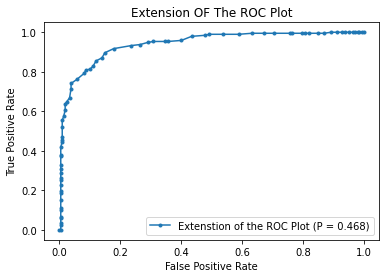

In [42]:

plt.plot(rf_fpr, rf_tpr, marker='.', label='Extenstion of the ROC Plot (P = 0.468)' % rf_auc)


# Title
plt.title('Extension OF The ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

---